# **MULTIPLE LINEAR REGRESSION**

**KELOMPOK 4**

Afeef Radithya Rashid - 1305213036

Dely Rafael Sefriansya - 1305210086

Muhammad Abrar Triyadi - 1305213046

Muhammad Hafizh Nursyahid - 1305213080

#**Rumusan Masalah**

1. Hasil analisis deskriptif pada data
2. Visualisasi plot untuk setiap kolom data
3. Hasil analisis korelasi antar kolom data
4. Hasil analisis regresi linier pada data berdasarkan variabel penjelas & variabel respon

# **Tujuan Masalah**

1. Mengetahui hasil analisis deskriptif pada data
2. Melihat hasil visualisasi plot untuk setiap kolom data
3. Mengetahui hasil analisis korelasi antar kolom data
4. Mengetahui hasil analisis regresi linier pada berdasarkan variabel penjelas & variabel respon

# **Deskripsi Dataset**
Link Dataset : https://www.kaggle.com/datasets/farhanmd29/50-startups

Dataset yang kami gunakan adalah dataset yang diambil dari kaggle yang berisi tentang data 50 startups. Dataset ini memiliki data yang dikumpulkan dari negara bagian New York, California dan Florida tentang 50 Startup bisnis "17 di setiap negara bagian". Variabel yang digunakan dalam dataset adalah Profit, R&D spending, Administration Spending, and Marketing Spending.
1. Profit = Kolom yang berisi laba yang dihasilkan perusahaan
2. R&D spending = Kolom yang berisi pengeluaran divisi riset & development
3. Administration spending = Pengeluaran divisi administrasi
4. Marketing spending = Pengeluaran divisi marketing
5. State = Menampilkan kota dari startup

# Source Code

###Import Libraries and Read Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Prenagen24/Multiple-Linear-Regression/main/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### EDA

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


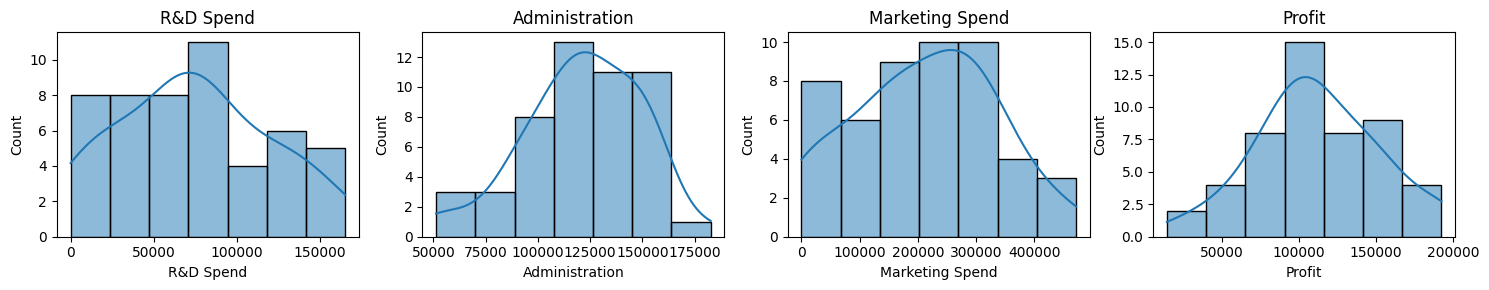

In [ ]:
vis = df.drop(columns='State')
fig, axes = plt.subplots(1, 4, figsize=(15, 3))
for i, column in enumerate(vis.columns):
    ax = axes[i]
    sns.histplot(data=vis, x=column, kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

Barplot diatas memberi visualisasi terhadap distribusi data yang kami miliki. Distribusi dari data tersebut condong kearah distribusi normal walaupun tidak terlalu bagus. Hal ini menjadi alasan dari normalisasi yang kami lakukan di tahap berikutnya.

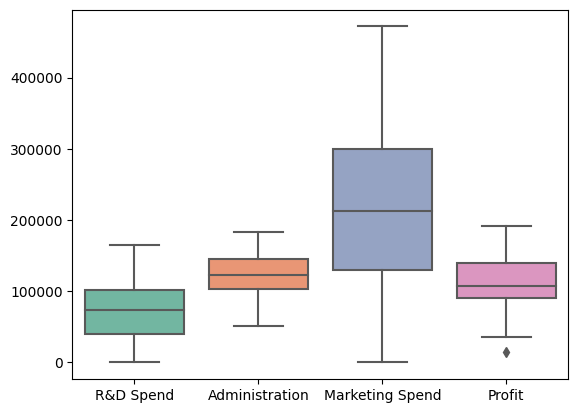

In [ ]:
sns.boxplot(data=vis,palette='Set2')
plt.show()

Boxplot diatas memberikan visualisasi terhadap pemusatan data yang kami miliki. Pada visualisasi tersebut, kami juga menemukan terdapat satu data pada atribut Profit yang menjadi pencilan. Pada tahap berikutnya, kami akan melakukan penanganan terhadap data ini.

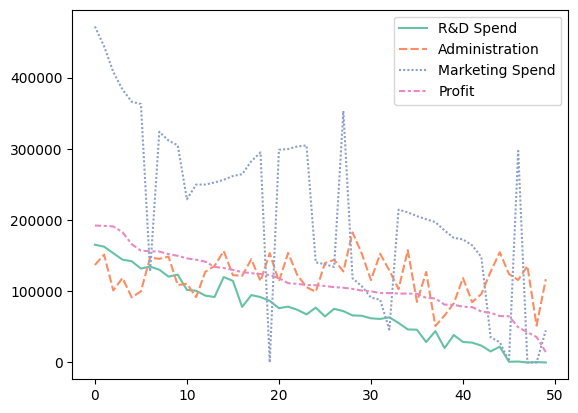

In [ ]:
sns.lineplot(data=vis,palette='Set2')
plt.show()

Lineplot diatas memberikan visualisai terhadap variansi data dari tiap atribut yang ada. Pada visualisasi tersebut, Marketing Spend memiliki variansi yang sangat beragam, tidak seperti ketiga atribut lainnya.

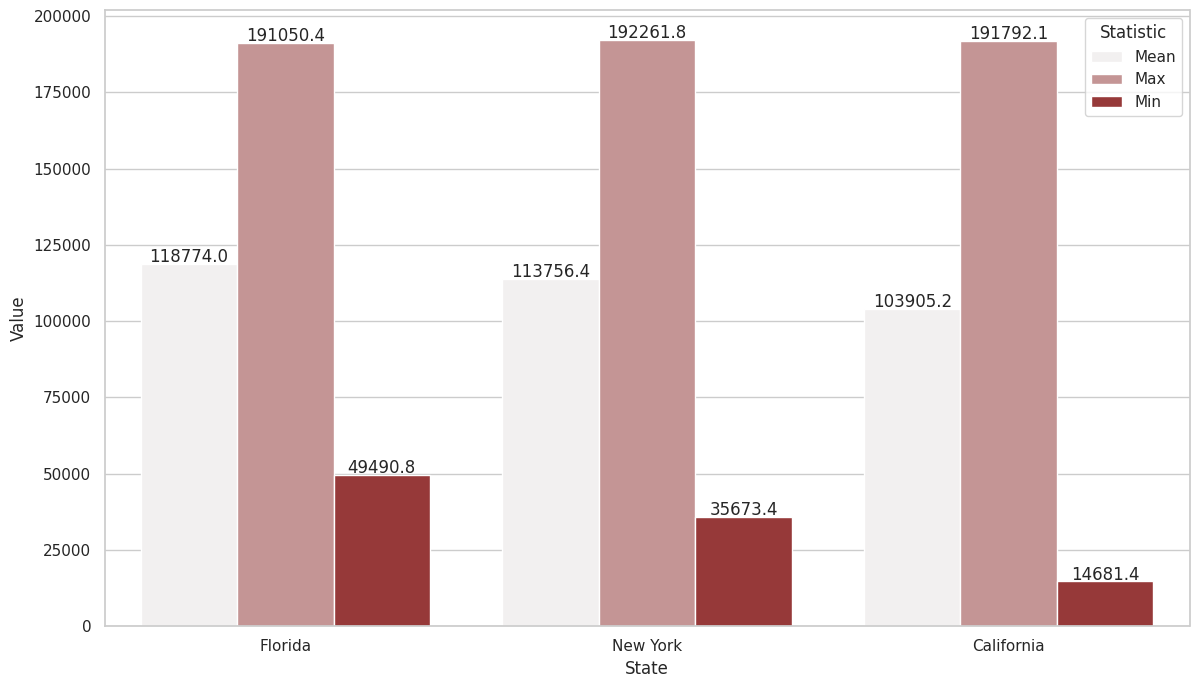

In [ ]:
MEAN = stateProfMean = df.groupby(by='State')['Profit'].mean().reset_index().sort_values(by='Profit',ascending=False)
MAX = stateProfMax = df.groupby(by='State')['Profit'].max().reset_index().sort_values(by='Profit',ascending=False)
MIN = stateProfMin = df.groupby(by='State')['Profit'].min().reset_index().sort_values(by='Profit',ascending=False)

grouped = pd.merge(MEAN, MAX, on='State')
grouped = pd.merge(grouped, MIN, on='State')
grouped.rename(columns={'Profit_x':'Mean', 'Profit_y':'Max', 'Profit':'Min'},inplace=True)
grouped = grouped.melt(id_vars='State', var_name='Statistic', value_name='Value')


sns.set(style='whitegrid')
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='State', y='Value', hue='Statistic', data=grouped, color="Brown")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 5),
                fontsize=12,
                textcoords='offset points')
plt.show()

Barplot diatas menunjukkan perbandingan profit dari tiap state yang ada pada dataset kami. Profit tertinggi secara rata rata dan Maximum dipegang oleh New York, dan secara nilai minimun, yang terendah dipegang oleh California

In [ ]:
quartiles = df['Profit'].describe()[['25%', '75%']]
Q1 = quartiles['25%']
Q3 = quartiles['75%']

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Profit'] = np.where((df['Profit'] < lower_bound),Q1,df['Profit'])

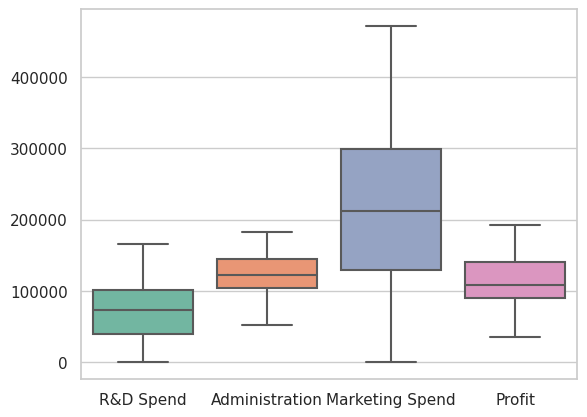

In [ ]:
sns.boxplot(df,palette='Set2')
plt.show()

Boxplot diatas memberikan visualisasi terhadap pemusatan data yang sudah kami beri penanganan terhadap outliers dengan mengubah valuenya menjadi lower bound datanya.

### Korelasi Antar Atribut

<ipython-input-10-946acfa1281b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=df.corr()


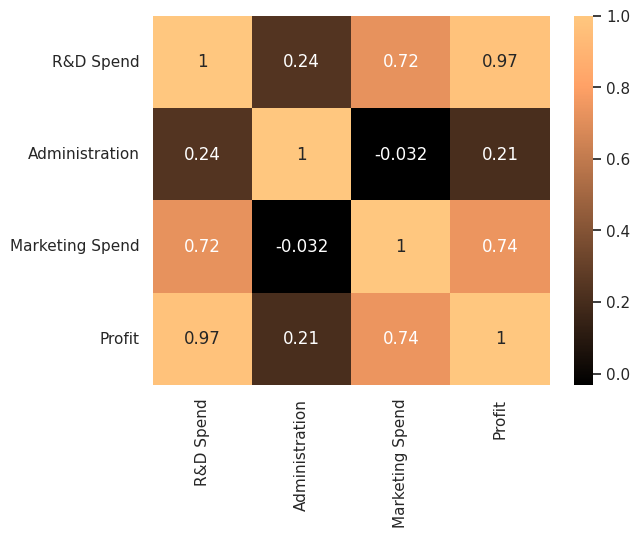

In [ ]:
c=df.corr()
sns.heatmap(c,annot=True,cmap='copper')
plt.show()

Berdasarkan Matrix Korelasi yang telah kami hitung, maka variabel dependen nya adalah atribut Profits dan variabel independen nya adalah R&D Spend dan Marketing Spend. Kedua atribut tersebut kami jadikan sebagai variabel independen karena memiliki korelasi yang tinggi dengan varibael dependen nya.

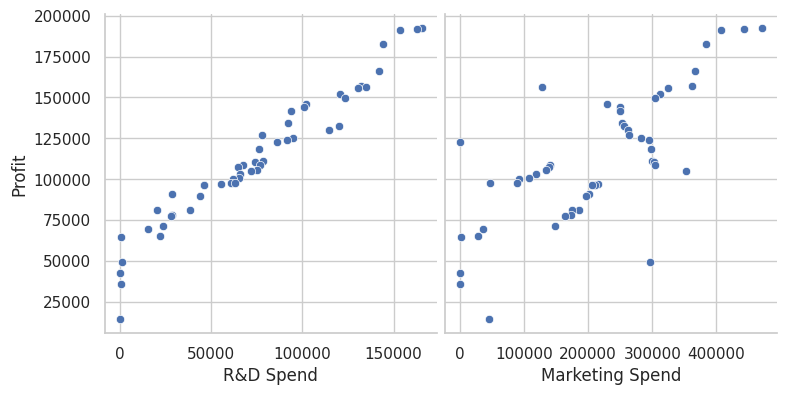

In [ ]:
sns.pairplot(vis , x_vars=['R&D Spend', 'Marketing Spend'], y_vars='Profit', height=4, aspect=1, kind='scatter')
plt.show()

Berikut merupakan Scatterplot dari antara variabel-variabel independen dan dependen.

### Pembahasan Model



Regresi Linear yang kami lakukan pada tugas kali ini ada Multiple Linear Regression. Multiple Linear Regression merupakan sebuah model regresi linear yang menyelesaikan masalah regresi dengan variabel $y$ atau biasa disebut dependen yang dipelajari bergantung pada lebih dari satu variabel independen.

Langkah - Langkah :

1. Tentukan tujuan dan variabel dependen
2. Tentukan jumlah variabel independen
3. Pengumpulan data dan perhitungan regresi

Berikut formula dari perhitungan Multiple Linear Regresiion:

$y = \beta_0 + \sum_{k=1}^K \beta_i x_{i,k} + \in_i$

$\beta_0 = intercept$,  $\beta_k$ = Population slope masing-masing variabel independen $x_k, k = 1,2,...K$, dan $\in_i$ = random error



Tahapan Implementasi Model :
1. Traint-Test Split
2. Training Model
3. Predict Model dan Error Calculation

### Implementasi Model

Traint-Test Split

In [ ]:
# Memisahkan atribut prediksi (X) dan target (y)
x = df[["R&D Spend", "Marketing Spend"]]
y = df["Profit"]

In [ ]:
# Melakukan penskalaan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
Y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=40)


Training Model

In [ ]:
# Membangun model Linear Regression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

Predict Model dan Error Calculation

In [ ]:
# Memprediksi Profit pada set pengujian
y_pred = LinReg.predict(X_test)

In [ ]:
# Menhitung Error Calculation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Menampilkan Error Calculation
print(f'MSE : {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE : {mae:.4f}')
print("R^2 : {:.2f}%".format(r2 * 100))

MSE : 0.1633
RMSE: 0.4041
MAE : 0.2700
R^2 : 87.92%


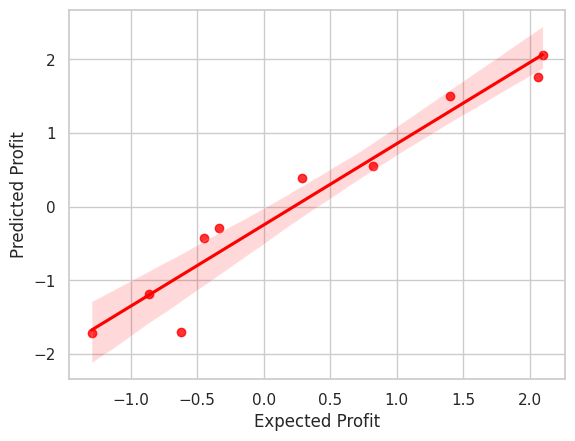

In [ ]:
sns.regplot(x=y_test,y=y_pred,color='Red')
plt.xlabel('Expected Profit')
plt.ylabel('Predicted Profit')
plt.show()

In [ ]:
# Membuat data frame dari setiap list
df1 = pd.DataFrame(data=X_test, columns=['R&D Spend', 'Marketing Spend'])
df2 = pd.DataFrame(data=y_test, columns=['Expected Profit'])
df3 = pd.DataFrame(data=y_pred, columns=['Predicted Profit'])
df3

,Predicted Profit
0,-0.421304
1,-0.287688
2,-1.703192
3,-1.179323
4,-1.713550
5,2.059737
6,0.394198
7,1.497835
8,0.547995
9,1.764818


In [ ]:
# Menggabungkan data frame dan mengembalikan nilai normalisasi
df_combined = pd.concat([df1, df2, df3], axis=1)
df_combined = pd.DataFrame(scaler.inverse_transform(df_combined),columns = ['R&D Spend', 'Marketing Spend','Expected Profit','Predicted Profit'])
df_combined

,R&D Spend,Marketing Spend,Expected Profit,Predicted Profit
0,98459.835150,114641.394255,96778.9200,97702.299913
1,106815.233152,81299.805118,101004.6400,102719.400794
2,52603.862910,62080.355317,90138.9025,49568.778980
3,69320.054810,105531.949375,81229.0600,69239.509562
4,53430.376775,48659.802143,64926.0800,49179.853417
5,189235.843964,194400.005533,192261.8300,190862.674313
6,128418.378438,139542.886164,124266.9000,128323.479459
7,170030.541640,161641.758501,166187.9400,169763.854358
8,135791.500537,125531.193347,144259.4000,134098.399364
9,179396.236186,174596.131152,191050.3900,179788.792603


In [ ]:
# Menghitung jumlah total observasi
n_total = len(y_test)

# Menghitung jumlah kelompok
n_groups = len(np.unique(y_test))

# Menghitung rata-rata target aktual
mean_total = np.mean(y_test)

# Menghitung varians sejati Between Groups
var_between = n_groups * np.sum((np.mean(y_pred) - mean_total) ** 2)

# Menghitung varians sejati Within Groups
var_within = np.sum((y_pred - y_test) ** 2)

# Menghitung varians sejati Total
var_total = var_between + var_within

print("Between Groups Variance :", var_between)
print("Within Groups Variance  :", var_within)
print("Total Variance          :", var_total)

Between Groups Variance : 0.4637039324214125
Within Groups Variance  : 1.6332061137681932
Total Variance          : 2.0969100461896057
